# Outline

- [1 - Packages](#1)
- [2 - Importing Data](#2)
    - [2.1 - Prepare Data for Merging](#2.1)
- [3 - Data Cleaning](#3)
- [4 - Exploratory Data Analysis](#4)
- [5 - Data Preprocessing](#5)
- [6 - ML : Train the Model](#6)
- [7 - ML : Best Model](#7)
- [8 - Conclusion](#8) 

---

## Dataset Description

### Context
`Regression` Challenge: Predicting Market Costs! This competition tasks with building advanced regression models to accurately predict the costs of products within a diverse market landscape. Leveraging a comprehensive dataset, including factors ranging from market dynamics to consumer attributes, goal is to develop models that uncover hidden patterns in the data to provide precise cost predictions.

### Features in test data
- `Person Description` - Description of the person visiting the market
- `Place Code` - Code for each place which consists of 2 city codes parts separated by "_"
- `Customer Order` - Order of each customer in the market
- `Additional Features in market` - A list of features that are found in the market
- `Promotion Name` - Made by the market on media
- `Store Kind` - A genre for the store
- `Store Cost` - Cost of the Store
- `Store Sales` - The amount of money spent on sales that have been made since the store first opened.
- `Gross Weight` - Bought item weight
- `Net Weight` - Bought item weight without the package
- `Package Weight` - Weight of the Package
- `Is Recyclable?` - If the item is Recyclable or no
- `Yearly Income` - Min. Income for the consumer per year
- `Store Area` - Area of the store
- `Grocery Area` - Area of the grocery department in the store
- `Frozen Area` - Area of the frozen food department in the store
- `Meat Area` - Area of the Meat department in the store
- `Cost` - The target variable

<a name='1'></a>
## 1 - Packages

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 
import ast,re 

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer,SimpleImputer

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,LabelEncoder,OrdinalEncoder,\
PowerTransformer,PolynomialFeatures

from sklearn.feature_selection import SelectKBest,f_regression,SelectFromModel

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor,XGBClassifier
from sklearn.ensemble import RandomForestRegressor, VotingRegressor,
RandomForestClassifier,ExtraTreesRegressor


from sklearn.metrics import mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

import jupyterthemes as jt
jt.stylefx.set_nb_theme('gruvboxd')

<a name='2'></a>
## 2 - Importing Data

In [2]:
data1 = pd.read_csv('../Data/IEEE_Victoris2_Filtration_train_data/Train_Batch_1.csv',index_col='Unnamed: 0')
data2 = pd.read_csv('../Data/IEEE_Victoris2_Filtration_train_data/Train_Batch_2.csv',index_col='Unnamed: 0')
data3 = pd.read_csv('../Data/IEEE_Victoris2_Filtration_train_data/Train_Batch_3.csv',index_col='Unnamed: 0')
test_data = pd.read_csv('../Data/test.csv',index_col='Unnamed: 0')

In [3]:
data1.sample()

,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
mc_ID_11585,"Married Female with four children, education: ...",V13er_BC,"Cleaning Supplies from Household department, O...","['Coffee Bar', 'Ready Food', 'Video Store', 'B...",I Cant Believe It Sale,NaN,1.86 Millions,0.837 Millions,"{'Gross Weight': 20.3503, 'Net Weight': 17.443...",non recyclable,70K+,2142.85,1525.28,NaN,249.73,535.92


In [4]:
test_data.sample()

,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area
10405,"Married Male with five children, education: pa...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",[],One Day Sale,Supermarket,7.05 Millions,3.1725 Millions,19.48,17.88,1.60,no,30K+,2811.99,2049.72,457.36,304.27


<a name='2.1'></a>
### 2.1 - Prepare Data for Merging

In [5]:
print(data1.shape)
print(data2.shape)
print(data3.shape)
print()
print(test_data.shape)

(19440, 16)
(12956, 17)
(6466, 18)

(19942, 17)


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19440 entries, mc_ID_0 to mc_ID_19354
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Person Description             19440 non-null  object 
 1   Place Code                     19440 non-null  object 
 2   Customer Order                 19440 non-null  object 
 3   Additional Features in market  15140 non-null  object 
 4   Promotion Name                 16530 non-null  object 
 5   Store Kind                     16530 non-null  object 
 6   Store Sales                    19440 non-null  object 
 7   Store Cost                     19440 non-null  object 
 8   Product Weights Data in (KG)   19440 non-null  object 
 9   Is Recyclable?                 19440 non-null  object 
 10  Min. Yearly Income             19437 non-null  object 
 11  Store Area                     17483 non-null  object 
 12  Grocery Area                   17460 no

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12956 entries, mc_ID_0 to mc_ID_12955
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Person Description             12956 non-null  object 
 1   Place Code                     12956 non-null  object 
 2   Customer Order                 12954 non-null  object 
 3   Additional Features in market  12956 non-null  object 
 4   Promotion Name                 11665 non-null  object 
 5   Store Kind                     11683 non-null  object 
 6   Store Sales                    12955 non-null  object 
 7   Store Cost                     12956 non-null  object 
 8   Gross Weight                   11014 non-null  float64
 9   Net Weight                     11018 non-null  float64
 10  Is Recyclable?                 12956 non-null  object 
 11  Min. Person Yearly Income      12952 non-null  object 
 12  Store Area                     11663 no

In [8]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6466 entries, mc_ID_0 to mc_ID_6465
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Person%20Description                 6466 non-null   object 
 1   Place%20Code                         6466 non-null   object 
 2   Customer%20Order                     6466 non-null   object 
 3   Additional%20Features%20in%20market  6466 non-null   object 
 4   Promotion%20Name                     4839 non-null   object 
 5   Store%20Kind                         4840 non-null   object 
 6   Store%20Sales                        6452 non-null   object 
 7   Store%20Cost                         6459 non-null   object 
 8   Gross%20Weight                       5491 non-null   float64
 9   Net%20Weight                         5511 non-null   float64
 10  Weights%20Data                       6466 non-null   object 
 11  Is%20Recyclable?       

In [9]:
data3.columns = data3.columns.str.replace('%20',' ')

#### Weights

In [10]:
data1['Product Weights Data in (KG)'][0]

"{'Gross Weight': 28.1997, 'Net Weight': 26.6008, 'Package Weight': 1.599}"

In [11]:
ast.literal_eval(data1['Product Weights Data in (KG)'][0])

{'Gross Weight': 28.1997, 'Net Weight': 26.6008, 'Package Weight': 1.599}

In [12]:
type(data3['Weights Data'][0])

str

In [13]:
data3['Weights Data']

mc_ID_0       {'Gross Weight': 23.2575, 'Net Weight': 20.350...
mc_ID_1       {'Gross Weight': 16.7163, 'Net Weight': 12.355...
mc_ID_2       {'Gross Weight': 10.5531, 'Net Weight': 7.6459...
mc_ID_3       {'Gross Weight': 23.6936, 'Net Weight': 20.641...
mc_ID_4       {'Gross Weight': 13.6056, 'Net Weight': 10.683...
                                    ...                        
mc_ID_6461    {'Gross Weight': 29.2172, 'Net Weight': 27.763...
mc_ID_6462    {'Gross Weight': 22.9668, 'Net Weight': 20.059...
mc_ID_6463    {'Gross Weight': 28.6358, 'Net Weight': 24.275...
mc_ID_6464    {'Gross Weight': 30.3801, 'Net Weight': 25.874...
mc_ID_6465    {'Gross Weight': 9.4629, 'Net Weight': 6.5557,...
Name: Weights Data, Length: 6466, dtype: object

In [14]:
data1['Product Weights Data in (KG)'] = data1['Product Weights Data in (KG)'].apply(ast.literal_eval)

data1['Gross Weight'] = data1['Product Weights Data in (KG)'].apply(lambda x : x['Gross Weight'])
data1['Net Weight'] = data1['Product Weights Data in (KG)'].apply(lambda x : x['Net Weight'])
data1['Package Weight'] = data1['Product Weights Data in (KG)'].apply(lambda x : x['Package Weight'])

data1.drop(columns=['Product Weights Data in (KG)'],inplace=True)


data2['Package Weight'] = data2['Gross Weight'] - data2['Net Weight']


data3['Weights Data'] = data3['Weights Data'].apply(ast.literal_eval)

data3['Gross Weight'] = data3['Weights Data'].apply(lambda x : x['Gross Weight'])
data3['Net Weight'] = data3['Weights Data'].apply(lambda x : x['Net Weight'])
data3['Package Weight'] = data3['Weights Data'].apply(lambda x : x['Package Weight'])

data3.drop(columns=['Weights Data'],inplace=True)

----

#### Income

In [15]:
data1.rename({'Min. Yearly Income':'Yearly Income'},axis=1,inplace=True)
data2.rename({'Min. Person Yearly Income':'Yearly Income'},axis=1,inplace=True)

#### complete data:

In [16]:
data = pd.concat([data1,data2,data3],ignore_index=True)

In [17]:
set(data.columns)-set(test_data.columns) 

{'Cost'}

In [18]:
data.head(2)

,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,Gross Weight,Net Weight,Package Weight
0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,recyclable,10K+,2842.23,2037.64,481.98,323,602.76,28.20,26.60,1.60
1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.66,16.57,14.97,1.60


In [19]:
data.shape

(38862, 18)

---

<a name='3'></a>
## 3 - Data Cleaning

#### Personal Description

In [20]:
def extract_person_description(data):
    data['Gender'] = data['Person Description'].str.extract(r'(Male|Female)')
    data['Marital Status'] = data['Person Description'].apply(lambda x : x.split()[0])
    
    def extract_number_of_children(description):
        match = re.search(r'with (\w+)\s+(?:children|child)', description, re.IGNORECASE)
        result = match.group(1).strip()
        return result if result else np.nan
    
    value_mapping = {'No': 0,'one': 1,'two': 2,'three': 3,'four': 4,'five': 5}
    data['Children'] = data['Person Description'].apply(extract_number_of_children).map(value_mapping)
    data['Children'] = data['Children'].astype('category')
    
    def extract_education(description):
        match = re.search(r'education:\s?([^,]+)working', description, re.IGNORECASE)
        return match.group(1).strip() if match else np.nan
    data['Education'] = data['Person Description'].apply(extract_education)
    
    def occupation(description):
        occupation_match = re.search(r'working as\s?([^,]+)', description, re.I)
        return occupation_match.group(1).strip() if occupation_match else np.nan
    data['Work'] = data['Person Description'].apply(occupation)
    
    data.drop(columns=['Person Description'],inplace=True)

In [21]:
extract_person_description(data)
extract_person_description(test_data)

---


#### Place Code

In [22]:
data['Place Code'].unique()

array(['H11go_ZA', 'S04ne_WA', 'L05es_CA', 'S03le_WA', 'M10da_YU',
       'A17co_GU', 'O09ba_VE', 'S01em_OR', 'P07nd_OR', 'B06ls_CA',
       'T02ma_WA', 'V19ia_BC', 'G16ra_JA', 'B14on_WA', 'C15ho_ZA',
       'V13er_BC', 'M12ty_DF', 'B08am_WA', 'S18co_CA'], dtype=object)

In [23]:
for d in [data,test_data]:    
    d['City'] = d['Place Code'].apply(lambda x: x.split('_')[1])
    d['Code'] = d['Place Code'].apply(lambda x: x.split('_')[0])
    d.drop(columns=['Place Code'],inplace=True)

---

#### Customer Order

In [24]:
def customer_order(df):
    df['Order Department'] = df['Customer Order'].str.extract(r'from\s(.*?)\sdepartment')
    df['Order Department'] = df['Order Department'].apply(lambda x : x.strip() if isinstance(x, str) else x)
    df['Order Brand'] = df['Customer Order'].str.extract(r'Ordered Brand : (.*?)$')
    df['Order Brand'] = df['Order Brand'].apply(lambda x : x.strip() if isinstance(x, str) else x )
    df['Order'] = df['Customer Order'].apply(lambda x: x.split("from")[0].strip() if isinstance(x, str) else None)
    df.drop(columns=['Customer Order'],inplace=True)
    return df

In [25]:
for d in [data,test_data]:
    customer_order(d)

---

#### Additional Features

In [26]:
data['Additional Features in market'].replace(np.nan,'[]',inplace=True)
test_data['Additional Features in market'].replace(np.nan,'[]',inplace=True)

In [27]:
sett = set()
for kk in data['Additional Features in market']:
    value = ast.literal_eval(kk)
    if value: [sett.add(value[i]) for i in range(len(value))]
sett

{'Bar For Salad', 'Coffee Bar', 'Florist', 'Ready Food', 'Video Store'}

In [28]:
sett = set()
for kk in test_data['Additional Features in market']:
    value = ast.literal_eval(kk)
    if value: [sett.add(value[i]) for i in range(len(value))]
sett

{'Bar For Salad', 'Coffee Bar', 'Florist', 'Ready Food', 'Video Store'}

In [29]:
data['Additional Features in market'].apply(lambda x : 1 if 'Bar For Salad' in ast.literal_eval(x) else 0).value_counts()

1    22830
0    16032
Name: Additional Features in market, dtype: int64

In [30]:
def additional_features(data):
    for f in ['Bar For Salad', 'Coffee Bar', 'Florist', 'Ready Food', 'Video Store']:
        data[f'AF {f}'] = data['Additional Features in market'].apply(lambda x : 1 if f in ast.literal_eval(x) else 0).astype('category')
    data.drop(columns=['Additional Features in market'],inplace=True)

In [31]:
additional_features(data)
additional_features(test_data)

---


#### Store Sales,Cost and Income

In [32]:
for df in [data,test_data]:
    df['Store Sales'] = df['Store Sales'].str.extract(r'(\d+.\d+)', expand = False).astype(float)
    df['Store Cost'] = df['Store Cost'].str.extract(r'(\d+.\d+)', expand = False).astype(float)
    df['Yearly Income'] = df['Yearly Income'].str.extract(r'(\d+)', expand = False).astype('category')

---

#### Recyclable

In [33]:
data['Is Recyclable?'].value_counts()

recyclable        10848
yes               10781
no                 8639
non recyclable     8592
Name: Is Recyclable?, dtype: int64

In [34]:
for d in [data,test_data]:    
    d['Is Recyclable?'] = d['Is Recyclable?'].map({'recyclable':1,'yes':1,'no':0,'non recyclable':0})
    d['Is Recyclable?'] = d['Is Recyclable?'].astype('category')

In [35]:
data.groupby('Is Recyclable?')['Cost'].mean()

Is Recyclable?
0.0   519.39
1.0   519.08
Name: Cost, dtype: float64

---

### Area

In [36]:

for i in ['Store Area','Grocery Area','Frozen Area','Meat Area']:
    data[i] = pd.to_numeric(data[i], errors='coerce')
    test_data[i] = pd.to_numeric(test_data[i], errors='coerce')

---

In [37]:
data.sample()

,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,Gross Weight,Net Weight,Package Weight,Gender,Marital Status,Children,Education,Work,City,Code,Order Department,Order Brand,Order,AF Bar For Salad,AF Coffee Bar,AF Florist,AF Ready Food,AF Video Store
7890,Weekend Discount,Supermarket,6.57,2.76,1.00,10,1970.94,1238.39,440.92,293.95,698.73,11.57,7.21,4.36,Male,Single,3,partial high school,manual,WA,S03le,Produce,Ebony,Vegetables,0,1,0,0,0


In [38]:
test_data.sample()

,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Gender,Marital Status,Children,Education,Work,City,Code,Order Department,Order Brand,Order,AF Bar For Salad,AF Coffee Bar,AF Florist,AF Ready Food,AF Video Store
8672,Big Time Discounts,Supermarket,2.91,1.25,11.15,6.79,4.36,0,70,1891.70,1508.00,227.80,149.93,Male,Married,4,high school degree,management,OR,P07nd,Deli,Cutting Edge,Meat,0,0,0,0,0


---

#### Missing Values

In [39]:
data.isna().sum()


Promotion Name      5828
Store Kind          5809
Store Sales           15
Store Cost             7
Is Recyclable?         2
Yearly Income          8
Store Area          3566
Grocery Area        3609
Frozen Area         3554
Meat Area           3550
Cost                  31
Gross Weight        1942
Net Weight          1938
Package Weight      3578
Gender                 0
Marital Status         0
Children               0
Education              0
Work                   0
City                   0
Code                   0
Order Department       2
Order Brand            2
Order                  2
AF Bar For Salad       0
AF Coffee Bar          0
AF Florist             0
AF Ready Food          0
AF Video Store         0
dtype: int64

In [40]:
test_data.isna().sum()

Promotion Name        26
Store Kind            28
Store Sales            0
Store Cost             0
Gross Weight         983
Net Weight          1018
Package Weight         0
Is Recyclable?         0
Yearly Income          0
Store Area           996
Grocery Area        1042
Frozen Area          961
Meat Area            975
Gender                 0
Marital Status         0
Children               0
Education              0
Work                   0
City                   0
Code                   0
Order Department       0
Order Brand            0
Order                  0
AF Bar For Salad       0
AF Coffee Bar          0
AF Florist             0
AF Ready Food          0
AF Video Store         0
dtype: int64

In [41]:
import missingno as msno

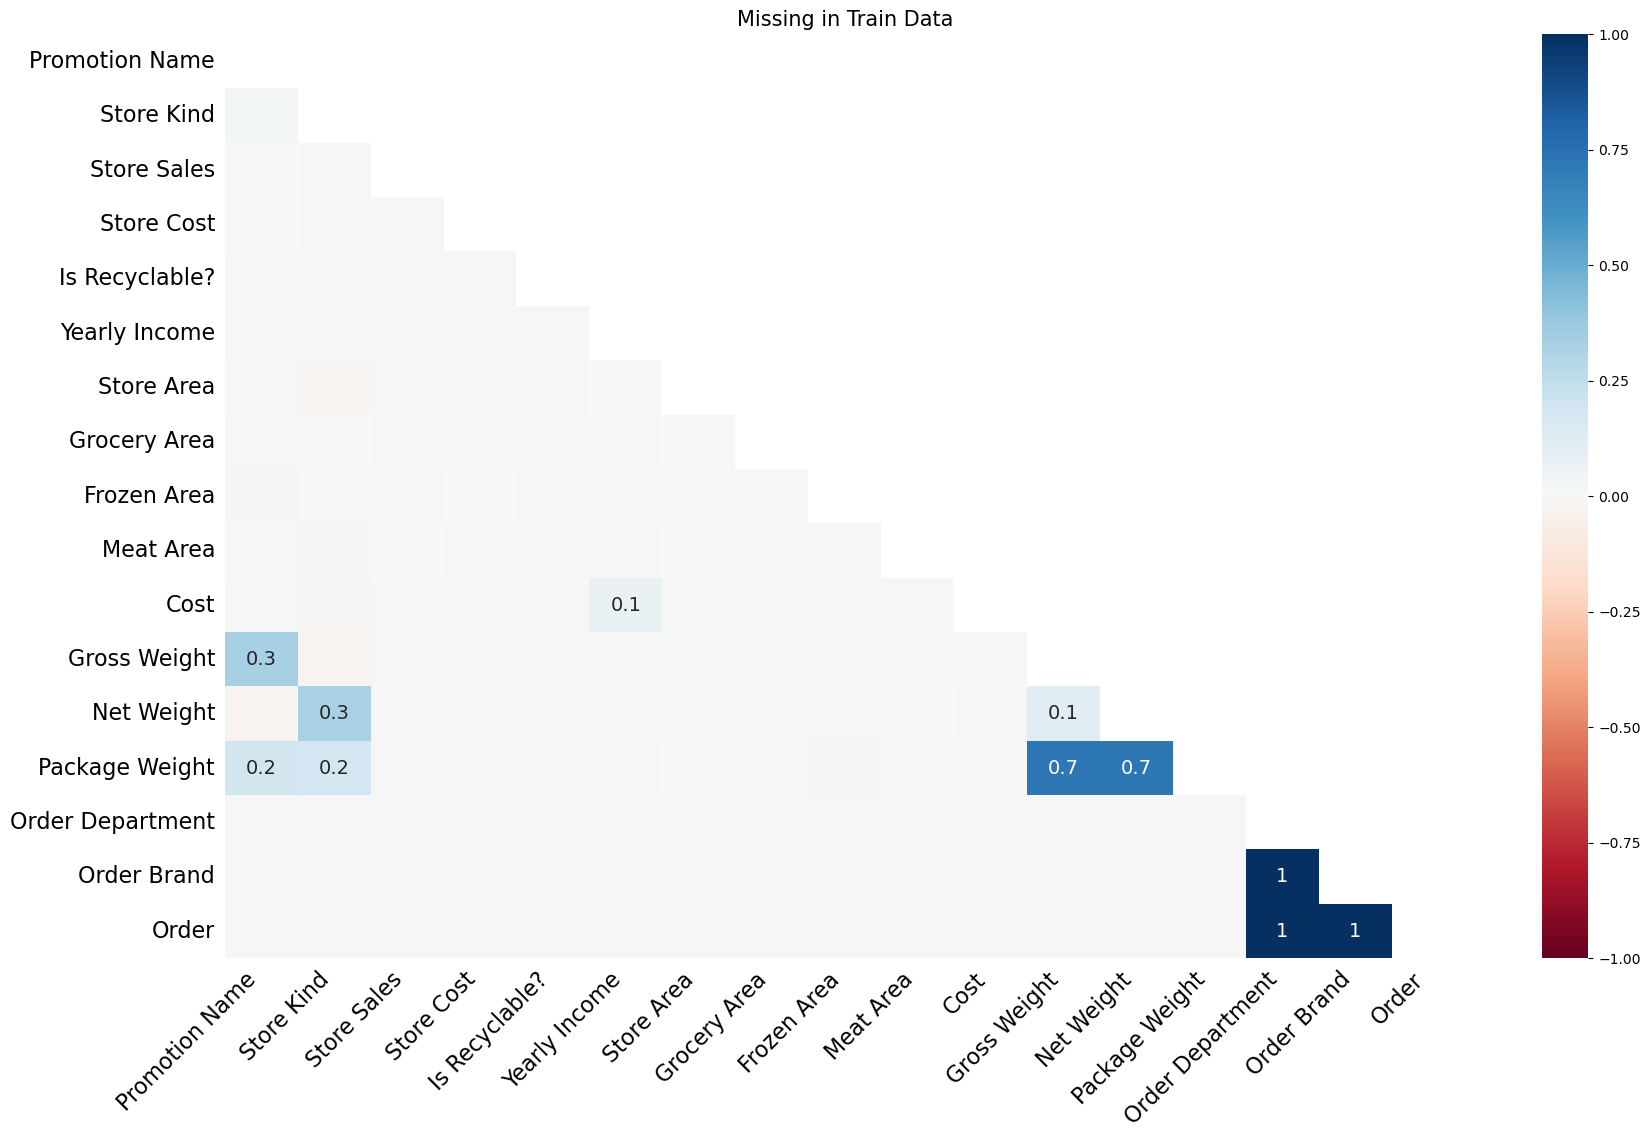

In [42]:
msno.heatmap(data)
plt.title('Missing in Train Data',size=15)
plt.show()

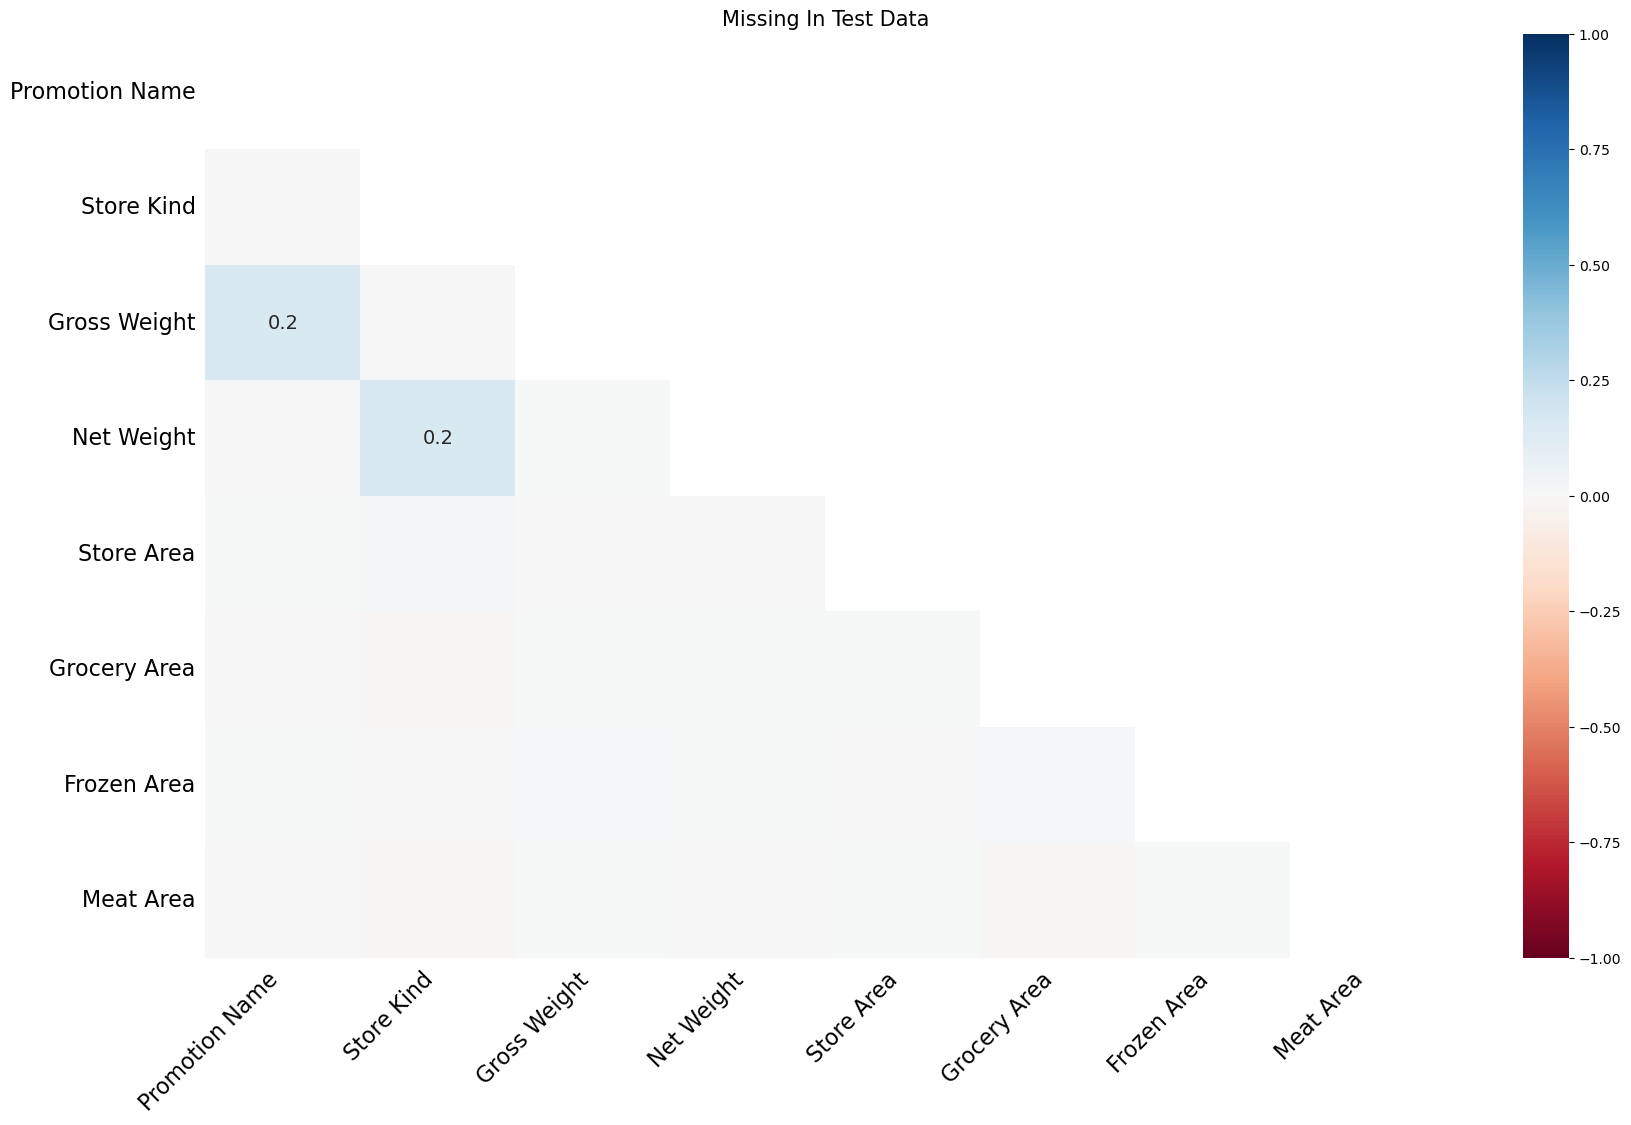

In [43]:
msno.heatmap(test_data)
plt.title('Missing In Test Data',size=15)
plt.show()

In [44]:
data.dropna(inplace=True)

In [45]:
test_data['Net Weight'] = test_data['Gross Weight'] - test_data['Package Weight']

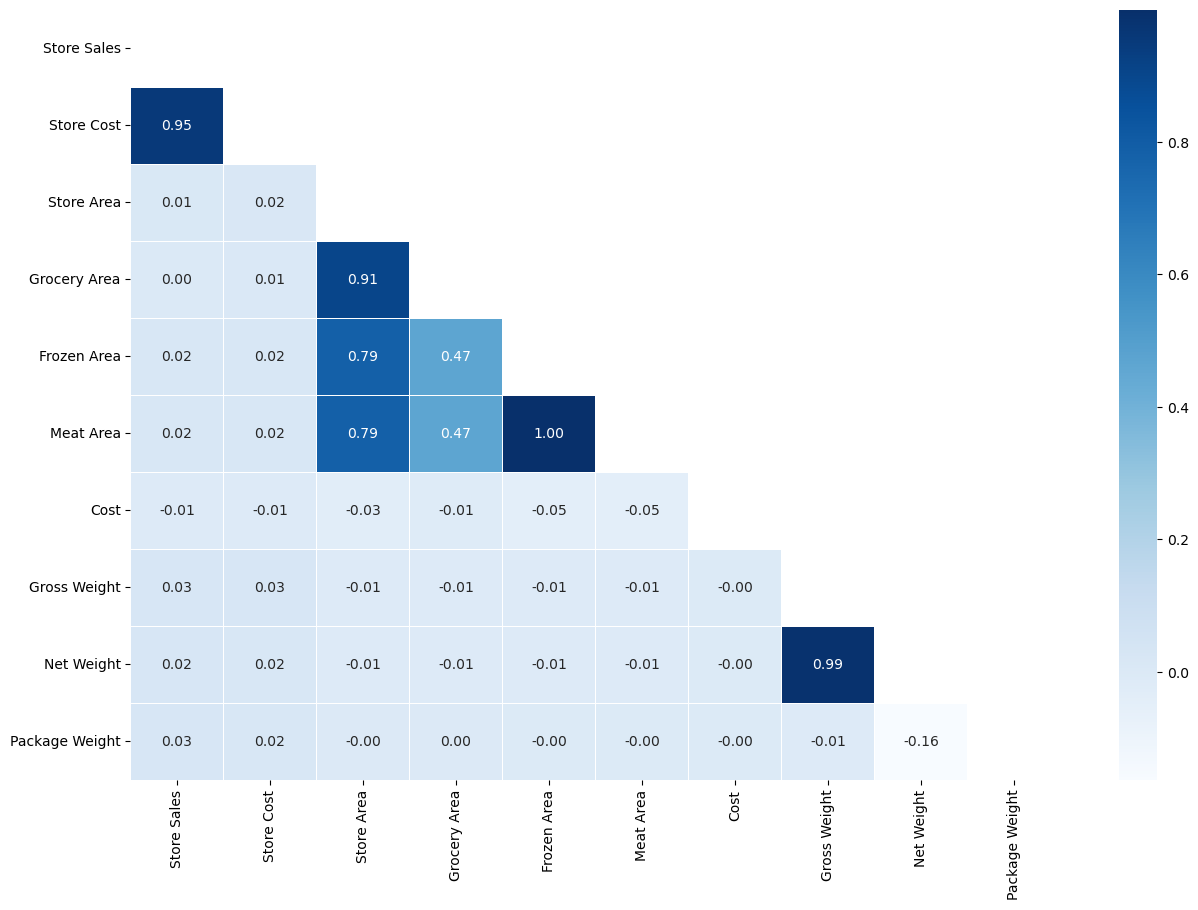

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),mask=np.triu(data.corr()),cmap='Blues',annot=True,fmt='.2f',linewidths=.5)
plt.show()

In [47]:
for d in [data,test_data]:
    d.drop(columns=['Meat Area','Frozen Area','Grocery Area',
                    'Gross Weight','Package Weight'],inplace=True)

In [48]:
test_data.dtypes

Promotion Name        object
Store Kind            object
Store Sales          float64
Store Cost           float64
Net Weight           float64
Is Recyclable?      category
Yearly Income       category
Store Area           float64
Gender                object
Marital Status        object
Children            category
Education             object
Work                  object
City                  object
Code                  object
Order Department      object
Order Brand           object
Order                 object
AF Bar For Salad    category
AF Coffee Bar       category
AF Florist          category
AF Ready Food       category
AF Video Store      category
dtype: object

In [49]:
num_col = list(data.select_dtypes(include=['float','int']).columns)
num_col.remove('Cost')
cat_col = list(data.select_dtypes(include=['object','category']).columns)

In [50]:
imputer = KNNImputer(n_neighbors=10)
test_data[num_col] = imputer.fit_transform(test_data[num_col])

In [51]:
test_data.isna().sum()

Promotion Name      26
Store Kind          28
Store Sales          0
Store Cost           0
Net Weight           0
Is Recyclable?       0
Yearly Income        0
Store Area           0
Gender               0
Marital Status       0
Children             0
Education            0
Work                 0
City                 0
Code                 0
Order Department     0
Order Brand          0
Order                0
AF Bar For Salad     0
AF Coffee Bar        0
AF Florist           0
AF Ready Food        0
AF Video Store       0
dtype: int64

<a name='4'></a>
## 4 - Exploratory Data Analysis

In [52]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Sales,18343.00,6.49,3.44,0.51,3.78,5.90,8.61,19.90
Store Cost,18343.00,2.60,1.44,0.16,1.49,2.37,3.46,9.09
Store Area,18343.00,2591.32,529.29,1882.71,2188.28,2572.86,2863.27,7857.55
Cost,18343.00,520.47,157.59,265.63,364.27,516.78,662.22,783.19
Net Weight,18343.00,17.16,6.76,4.43,11.29,16.86,22.97,30.23


In [53]:
data.describe(include=[object,'category']).T

,count,unique,top,freq
Promotion Name,18343,49,Save Price,744
Store Kind,18343,5,Supermarket,7885
Is Recyclable?,18343.00,2.00,1.00,10235.00
Yearly Income,18343,8,30,5865
Gender,18343,2,Female,9454
Marital Status,18343,2,Single,9230
Children,18343,6,4,3830
Education,18343,5,partial high school,5558
Work,18343,5,professional,6090
City,18343,10,WA,5862


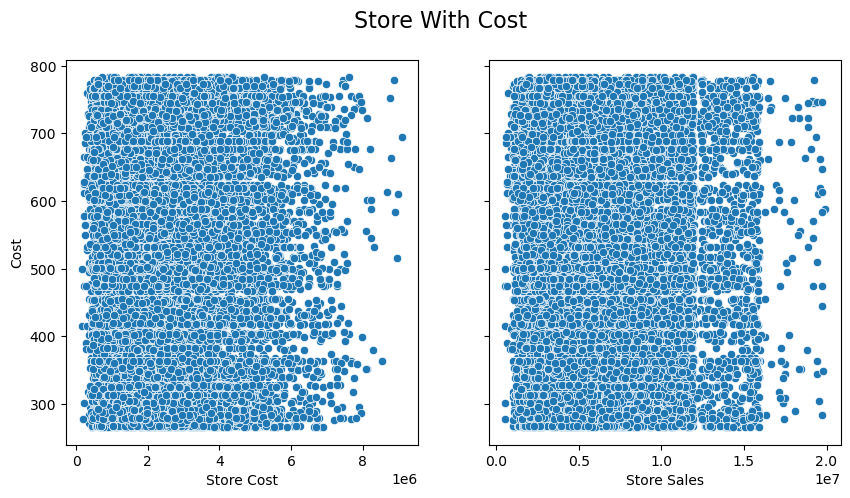

In [54]:
fig,ax=plt.subplots(1,2,figsize=(10,5),sharey=True)
sns.scatterplot(y=data['Cost'],x=data['Store Cost']*1000000,ax=ax[0])
sns.scatterplot(y=data['Cost'],x=data['Store Sales']*1000000,ax=ax[1])
fig.suptitle('Store With Cost',size=16)
plt.show()

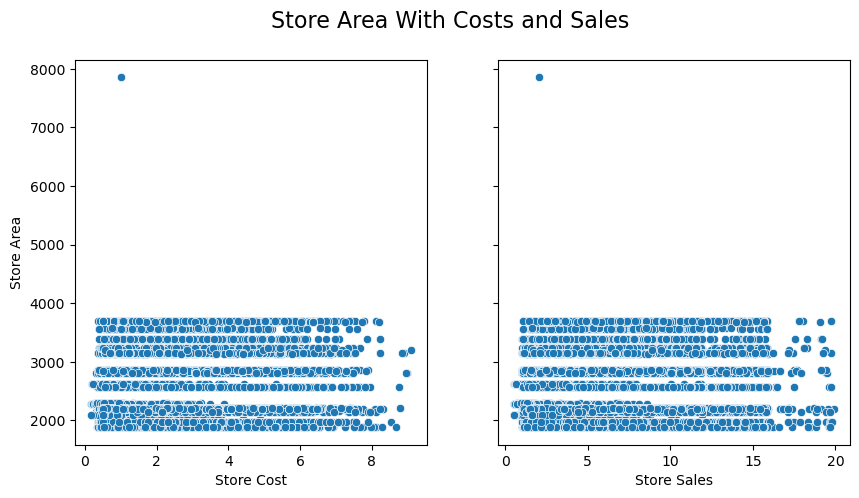

In [55]:
fig,ax=plt.subplots(1,2,figsize=(10,5),sharey=True)
sns.scatterplot(y=data['Store Area'],x=data['Store Cost'],ax=ax[0])
sns.scatterplot(y=data['Store Area'],x=data['Store Sales'],ax=ax[1])
fig.suptitle('Store Area With Costs and Sales',size=16)
plt.show()

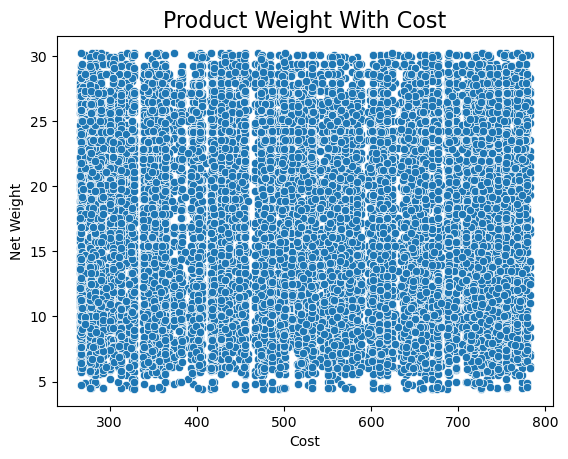

In [56]:
sns.scatterplot(y=data['Net Weight'],x=data['Cost'])
plt.title('Product Weight With Cost',size=16)
plt.show()

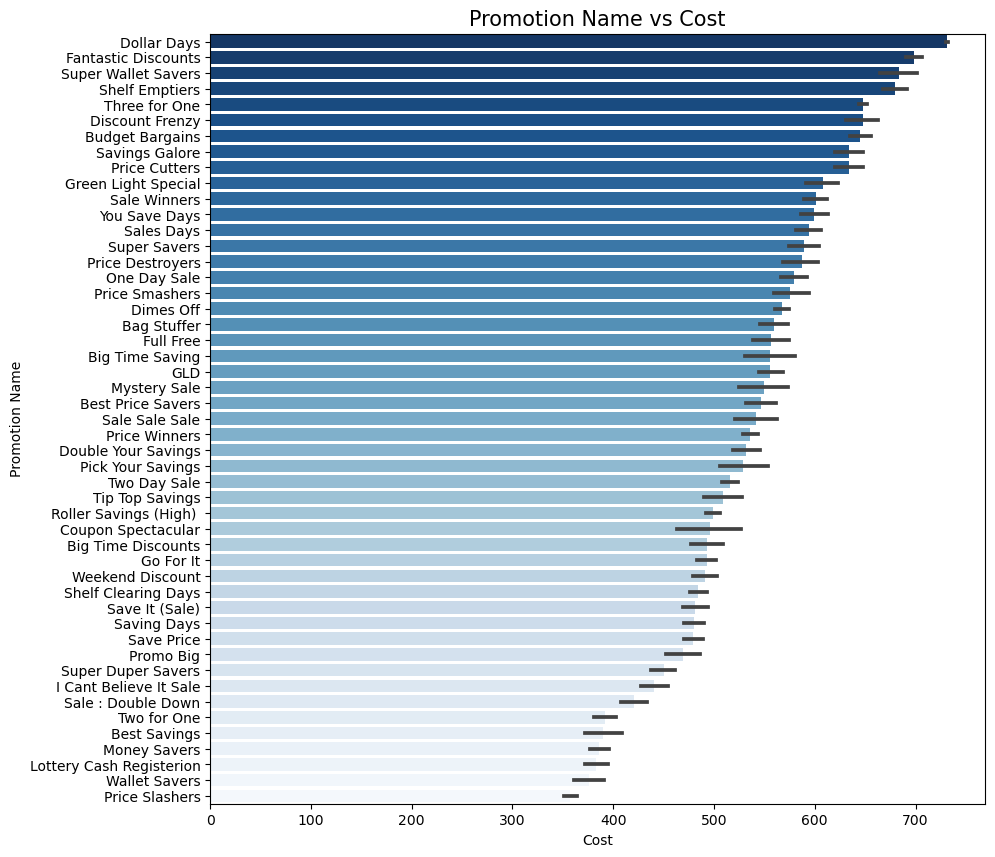

In [57]:
plt.figure(figsize=(10, 10))
sns.barplot(y='Promotion Name', x='Cost', data=data,
            order=data.groupby('Promotion Name')['Cost'].mean().sort_values(ascending=False).index,
            palette='Blues_r')
plt.title('Promotion Name vs Cost',size=15)
plt.xlabel('Cost')
plt.ylabel('Promotion Name')
plt.show()

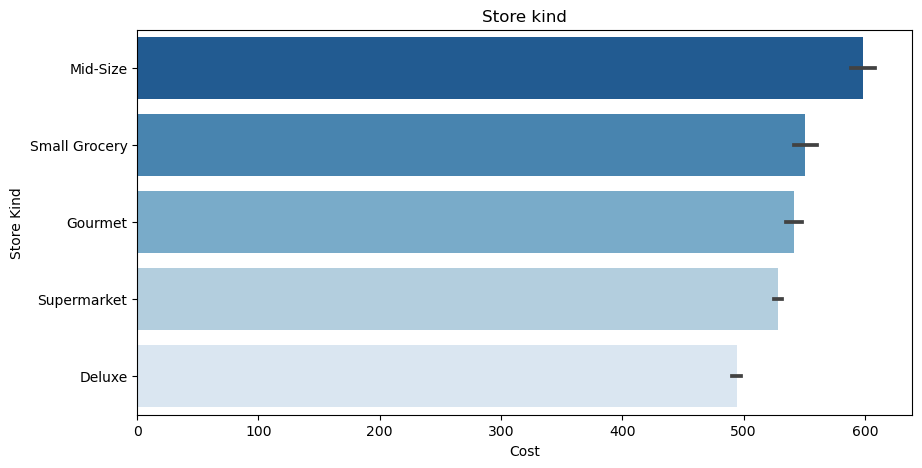

In [58]:
plt.figure(figsize=(10, 5))
sns.barplot(y='Store Kind', x='Cost', data=data,
            order=data.groupby('Store Kind')['Cost'].mean().sort_values(ascending=False).index,
            palette='Blues_r')
plt.title("Store kind")
plt.show()

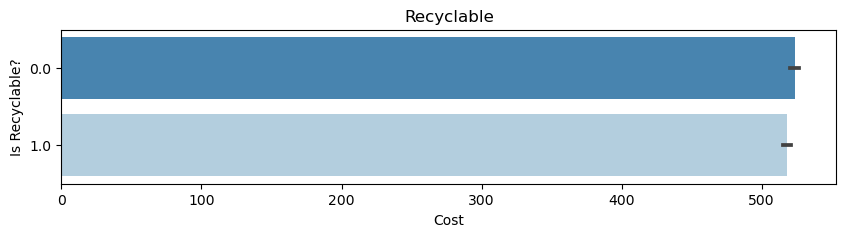

In [59]:
plt.figure(figsize=(10, 2))
sns.barplot(y='Is Recyclable?', x='Cost', data=data,
            order=data.groupby('Is Recyclable?')['Cost'].mean().sort_values(ascending=False).index,
            palette='Blues_r')
plt.title("Recyclable")
plt.show()

In [60]:
for d in [data,test_data]:
    d.drop(columns=['Is Recyclable?'],inplace=True)

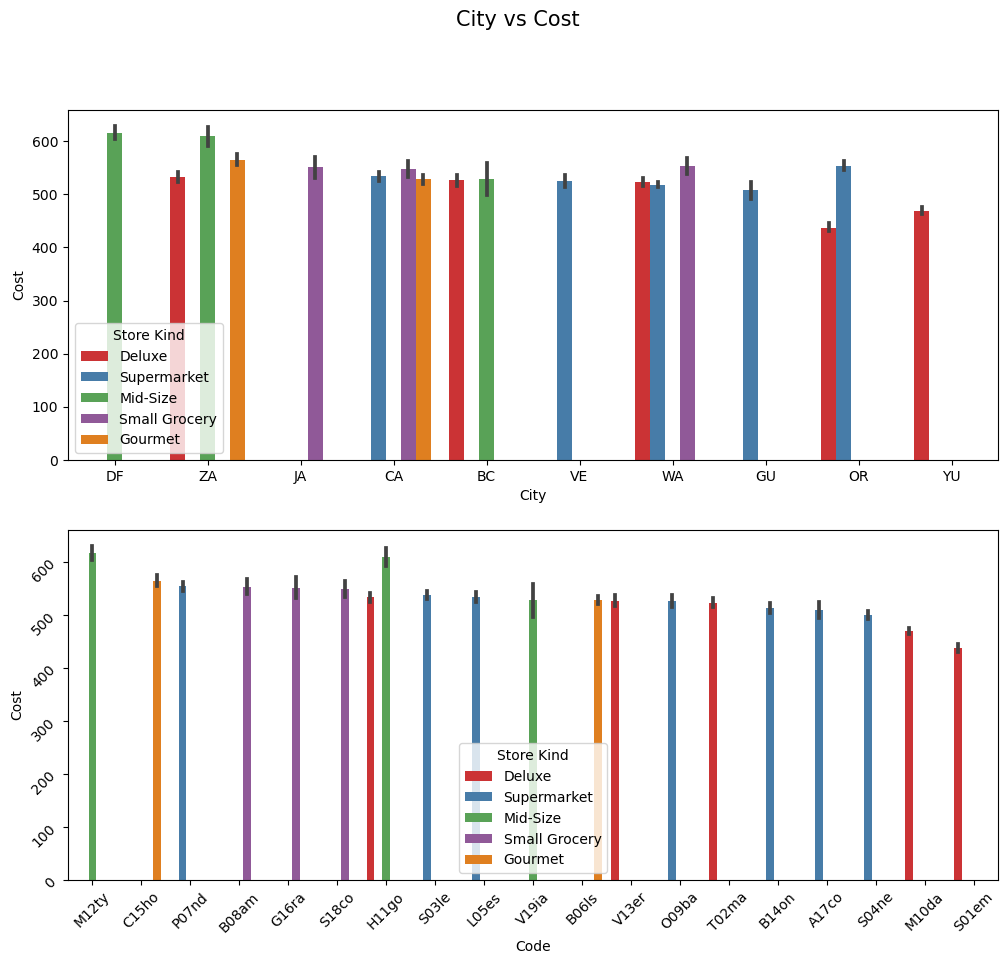

In [61]:
fig,ax= plt.subplots(2,1,figsize=(12, 10))
sns.barplot(x='City', y='Cost', data=data,
            order=data.groupby('City')['Cost'].mean().sort_values(ascending=False).index,
            palette='Set1',
           hue='Store Kind',
            ax=ax[0])
sns.barplot(x='Code', y='Cost', data=data,
            order=data.groupby('Code')['Cost'].mean().sort_values(ascending=False).index,
            palette='Set1',
           hue='Store Kind',
            ax=ax[1])
ax[1].tick_params(labelrotation=45)
fig.suptitle("City vs Cost",size=15)
plt.show()

In [62]:
city_store_counts = test_data.groupby('Code')['Store Kind'].agg(['nunique', 'first']).reset_index()
cities_with_one_store_kind = city_store_counts[city_store_counts['nunique'] < 3]
cities_with_one_store_kind= cities_with_one_store_kind.set_index('Code').drop(columns='nunique')

In [63]:
cities_with_one_store_kind = cities_with_one_store_kind.to_dict()['first']

In [64]:
cities_with_one_store_kind

{'A17co': 'Supermarket',
 'B06ls': 'Gourmet',
 'B08am': 'Small Grocery',
 'B14on': 'Supermarket',
 'C15ho': 'Gourmet',
 'G16ra': 'Small Grocery',
 'H11go': 'Deluxe',
 'L05es': 'Supermarket',
 'M10da': 'Deluxe',
 'M12ty': 'Mid-Size',
 'O09ba': 'Supermarket',
 'P07nd': 'Supermarket',
 'S01em': 'Deluxe',
 'S03le': 'Supermarket',
 'S04ne': 'Supermarket',
 'S18co': 'Small Grocery',
 'T02ma': 'Deluxe',
 'V13er': 'Deluxe',
 'V19ia': 'Mid-Size'}

In [65]:
def impute_missing_in_store_kind(x):
    if pd.isnull(x['Store Kind']):
        x['Store Kind'] = cities_with_one_store_kind[x['Code']]
    return x
test_data[['Store Kind','Code']] = test_data\
                                [['Store Kind','Code']].apply(impute_missing_in_store_kind,axis=1)

In [66]:
test_data.isna().sum()

Promotion Name      26
Store Kind           0
Store Sales          0
Store Cost           0
Net Weight           0
Yearly Income        0
Store Area           0
Gender               0
Marital Status       0
Children             0
Education            0
Work                 0
City                 0
Code                 0
Order Department     0
Order Brand          0
Order                0
AF Bar For Salad     0
AF Coffee Bar        0
AF Florist           0
AF Ready Food        0
AF Video Store       0
dtype: int64

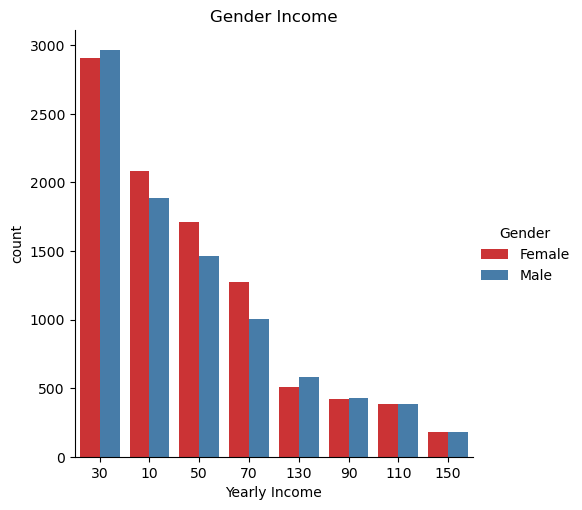

In [67]:
sns.catplot(x='Yearly Income',hue='Gender',data=data,order=data['Yearly Income'].value_counts().index,kind='count',palette='Set1')
plt.title("Gender Income")
plt.show()

In [68]:
data.groupby('Work')['Yearly Income'].first()

Work
clerical           30
management        130
manual             30
professional       10
skilled manual     30
Name: Yearly Income, dtype: category
Categories (8, object): ['10', '110', '130', '150', '30', '50', '70', '90']

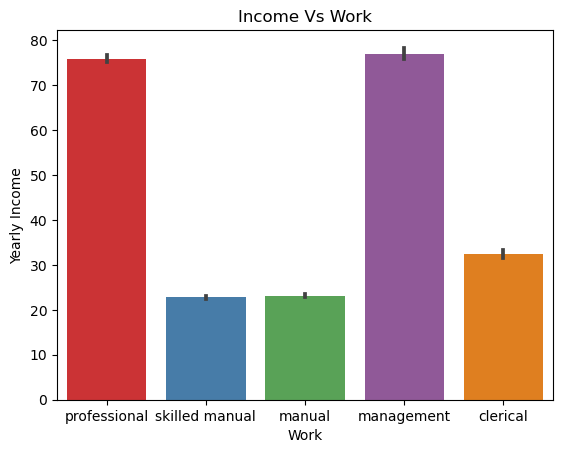

In [69]:
sns.barplot(y=data['Yearly Income'].astype('float'),x=data['Work'],
           palette='Set1')
plt.title('Income Vs Work')
plt.show()

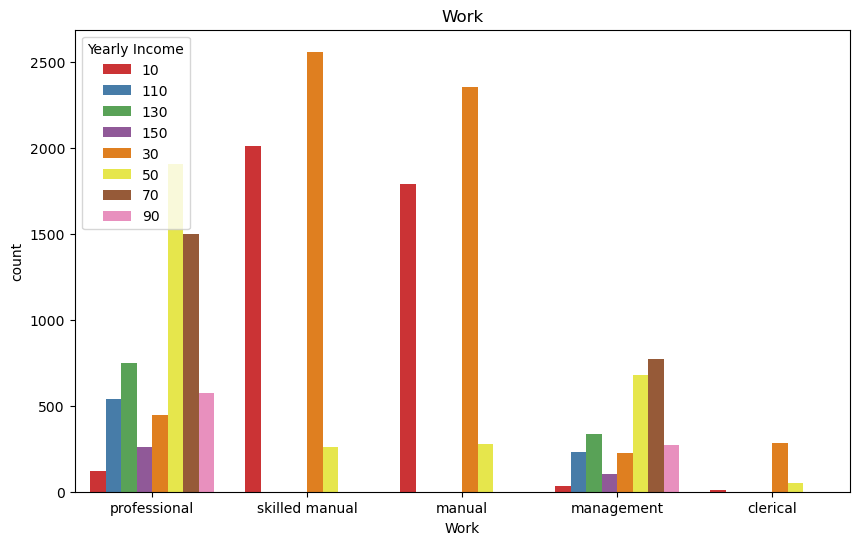

In [70]:
plt.figure(figsize=(10,6))
sns.countplot(data['Work'],palette='Set1',hue='Yearly Income',data=data)
plt.title('Work')
plt.show()

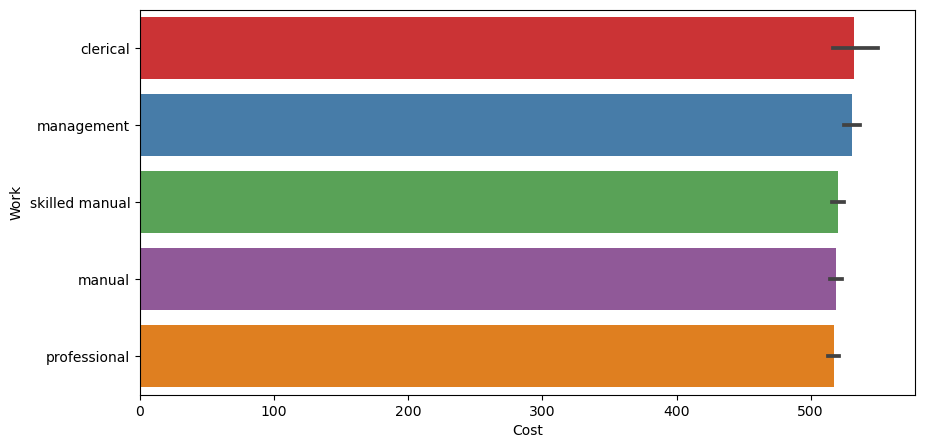

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(data['Cost'],data['Work'],palette='Set1',
           order=data.groupby('Work')['Cost'].mean().sort_values(ascending=False).index)
plt.show()

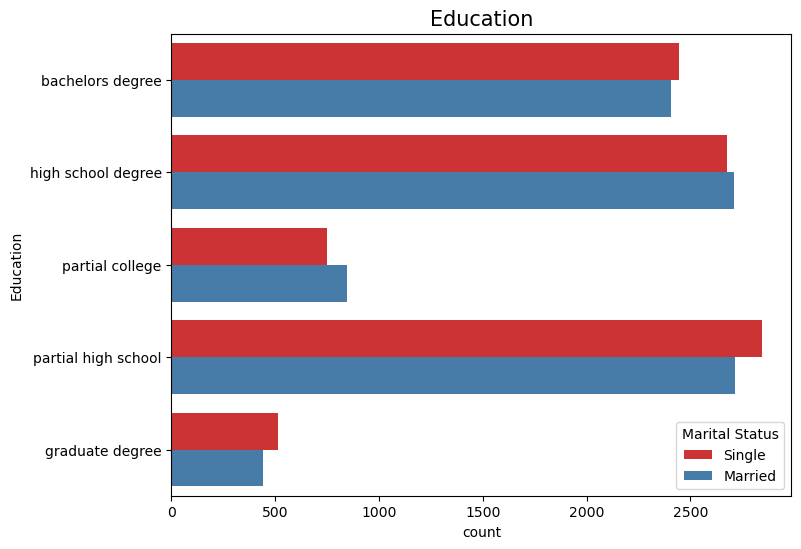

In [72]:
plt.figure(figsize=(8,6))
sns.countplot(y='Education',data=data,hue='Marital Status',palette='Set1')
plt.title('Education',size=15)
plt.show()

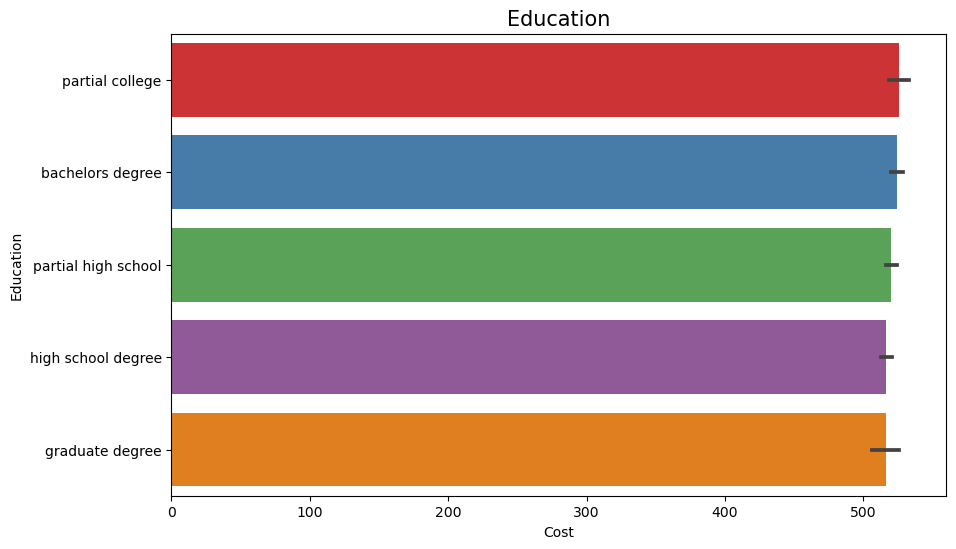

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(y='Education',data=data,x='Cost',palette='Set1',
            order=data.groupby('Education')['Cost'].mean().sort_values(ascending=False).index)
plt.title('Education',size=15)
plt.show()

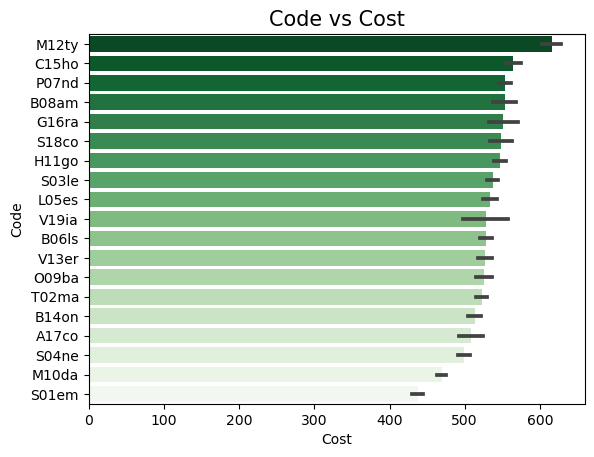

In [74]:
sns.barplot(x='Cost',y='Code',data=data,palette='Greens_r',
            order=data.groupby('Code')['Cost'].mean().sort_values(ascending=False).index)
plt.title('Code vs Cost',size=15)
plt.show()

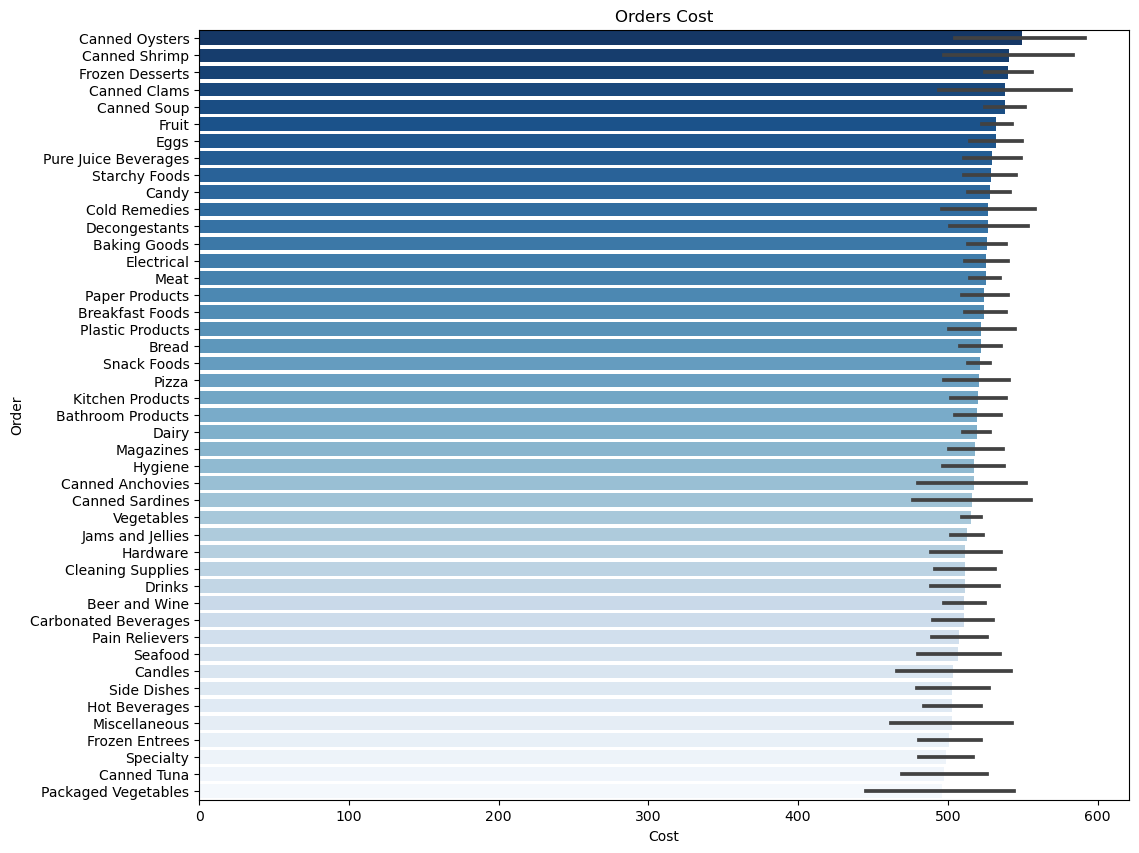

In [75]:
plt.figure(figsize=(12,10))
sns.barplot(y='Order',x='Cost',data=data,palette='Blues_r',
           order=data.groupby('Order')['Cost'].mean().sort_values(ascending=False).index)
plt.title("Orders Cost")
plt.show()

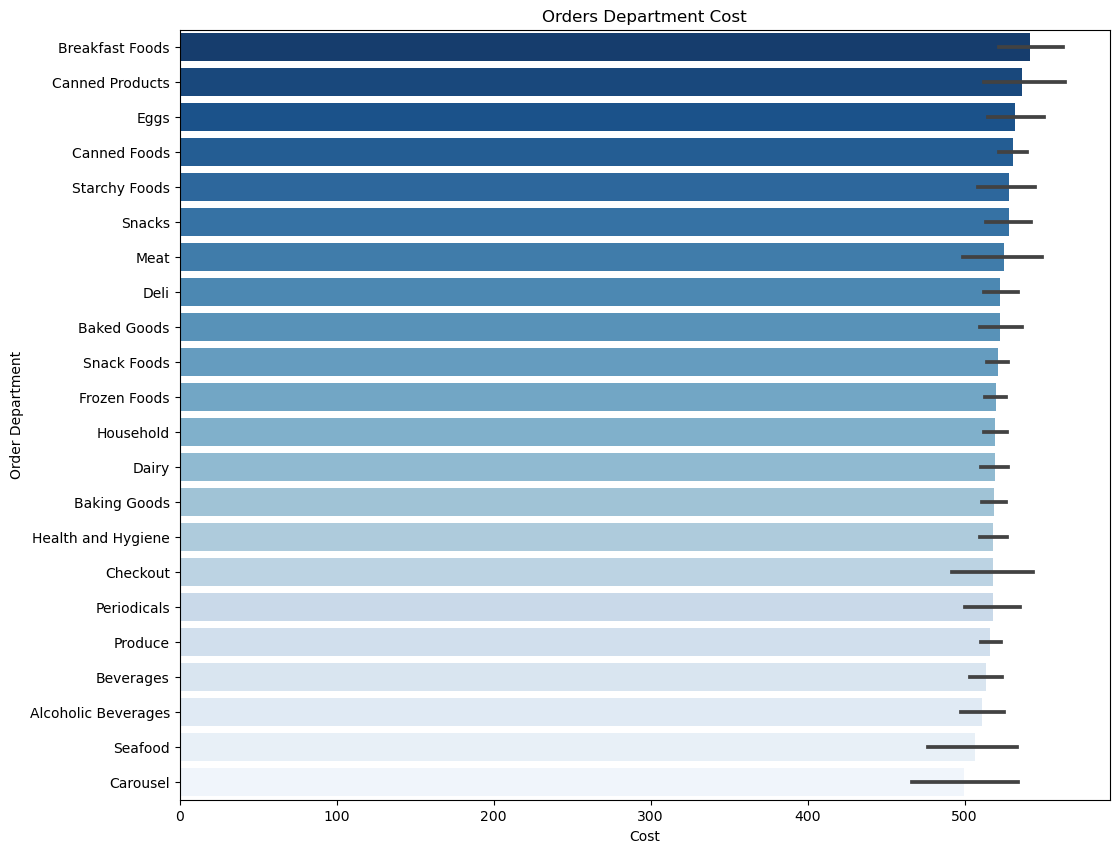

In [76]:
plt.figure(figsize=(12,10))
sns.barplot(y='Order Department',x='Cost',data=data,palette='Blues_r',
           order=data.groupby('Order Department')['Cost'].mean().sort_values(ascending=False).index)
plt.title("Orders Department Cost")
plt.show()

In [77]:
to_p = data.copy()
to_ps = test_data.copy()


---

In [78]:
puase HERE

SyntaxError: invalid syntax (2810490420.py, line 1)

In [79]:
data = to_p.copy()
test_data= to_ps.copy()
data.reset_index(drop=True,inplace=True)
test_data.reset_index(drop=True,inplace=True)

---

In [81]:
test_data.sample()

,Promotion Name,Store Kind,Store Sales,Store Cost,Net Weight,Store Area,Gender,Marital Status,Children,Education,Work,City,Code,Order,AF Bar For Salad,AF Coffee Bar,AF Florist,AF Ready Food,AF Video Store
6420,Best Savings,Supermarket,4.84,2.08,22.97,1971.09,Female,Single,5,high school degree,manual,WA,S03le,Specialty,0,1,0,0,0


---

<a name='5'></a>
## 5 - Data Preprocessing

In [82]:
test_data['Promotion Name'].fillna(test_data['Promotion Name'].value_counts().index[0],inplace=True)

In [83]:
test_data.isna().sum().sum()

0

---

In [85]:
data.sample()

,Promotion Name,Store Kind,Store Sales,Store Cost,Store Area,Cost,Net Weight,Gender,Marital Status,Children,Education,Work,City,Code,Order,AF Bar For Salad,AF Coffee Bar,AF Florist,AF Ready Food,AF Video Store
4590,Best Price Savers,Supermarket,4.60,1.66,1970.94,349.26,25.15,1,0,0,2,1,WA,S03le,Dairy,0,1,0,0,0


### Ordinal Encoding

In [86]:
to_ord = ['Work','Education','Store Kind']

In [91]:
ordd = OrdinalEncoder()
for col in to_ord:
    data[col] = ordd.fit_transform(data[[col]]).flatten()
    test_data[col] = ordd.transform(test_data[[col]]).flatten()

### Label Encoding

In [92]:
to_label_encoding = ['City','Order','Gender','Marital Status','Order Depratment','Order Brand']

In [93]:
label = LabelEncoder()
for col in to_label_encoding:
    data[col] = label.fit_transform(data[col])
    test_data[col] = label.transform(test_data[col])

### One Hot Encoding

In [94]:
to_one_hot= ['Code','Promotion Name']

In [95]:
print(set(test_data['Code'].unique()) == set(data['Code'].unique()))
print(set(test_data['Promotion Name'].unique()) == set(data['Promotion Name'].unique()))
print(set(test_data['Store Kind'].unique()) == set(data['Store Kind'].unique()))

True
True
True


In [96]:
encoder = OneHotEncoder(sparse=False)
for col in to_one_hot:
    encoded = encoder.fit_transform(data[[col]])
    test_encoded = encoder.transform(test_data[[col]])
    data = pd.concat([data,pd.DataFrame(encoded,columns=encoder.get_feature_names())],
                     axis=1)
    test_data = pd.concat([test_data,pd.DataFrame(test_encoded,columns=encoder.get_feature_names())],
                     axis=1)
    data.drop(columns=col,inplace=True)
    test_data.drop(columns=col,inplace=True)

In [97]:
print(data.shape)
print(test_data.shape)

(18343, 42)
(19942, 41)


In [98]:
data.drop(columns='Cost').columns == test_data.columns

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

#### Align Features

In [99]:
Cost = data['Cost']
allcols = list(set(data.columns)&set(test_data.columns))
allcols.sort()
data = data[allcols]
test_data = test_data[allcols]
data['Cost']=Cost

#### Normalization

In [100]:
X,y = data.drop(columns=['Cost']),data['Cost']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[num_col])
X[num_col] = pd.DataFrame(X_scaled, columns=num_col)

test_data_scaled = scaler.transform(test_data[num_col])
test_data[num_col] = pd.DataFrame(test_data_scaled, columns=num_col)

---

### Feature Selection

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=42,shuffle=True)

In [109]:
k_best = SelectKBest(score_func=f_regression, k='all')  
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

In [110]:
test_data_selected = k_best.transform(test_data)

In [111]:
selected_feature_indices = k_best.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices]
print("Selected Features:")
print(list(selected_feature_names)[:10])

Selected Features:
['AF Bar For Salad', 'AF Coffee Bar', 'AF Florist', 'AF Ready Food', 'AF Video Store', 'Children', 'City', 'Education', 'Gender', 'Marital Status']


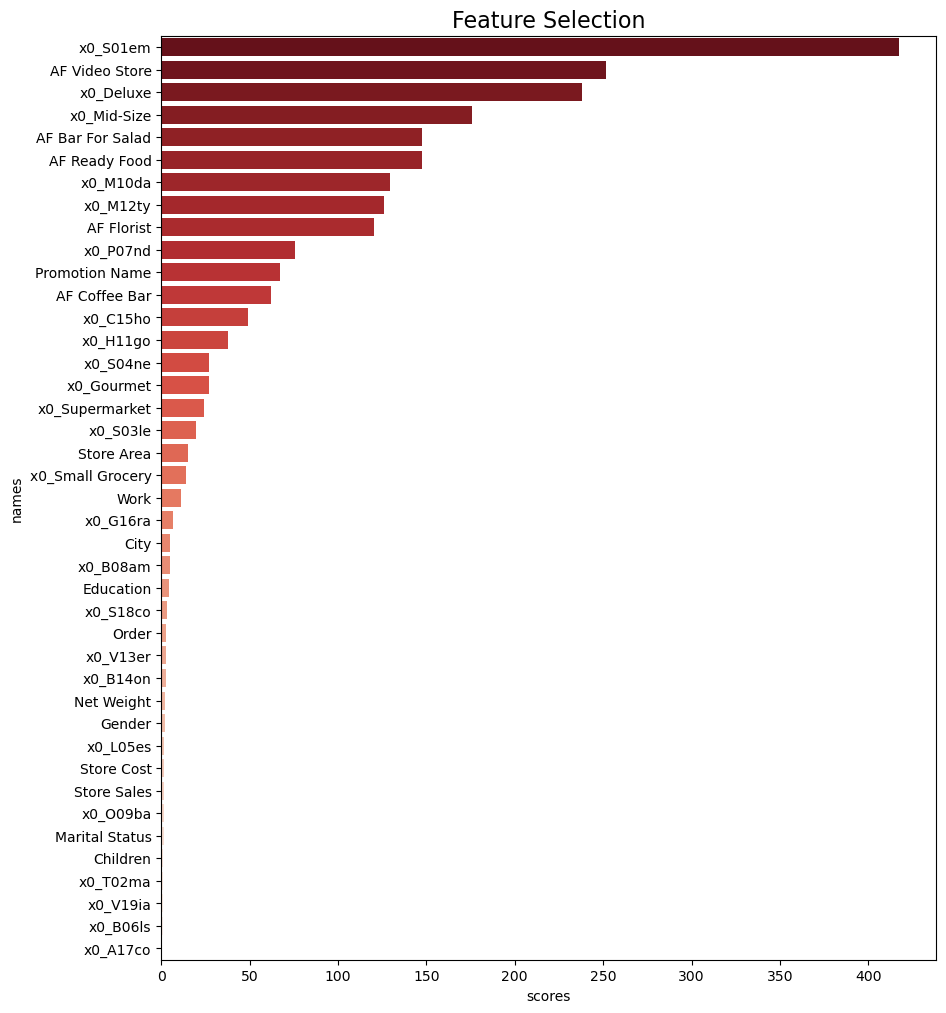

In [112]:
dd = pd.DataFrame({'names': selected_feature_names,
                   'scores': k_best.scores_[selected_feature_indices]}).sort_values(by='scores', ascending=False)
plt.figure(figsize=(10, 12))
sns.barplot(y=dd['names'], x=dd['scores'], palette='Reds_r')
plt.title('Feature Selection',size=16)
plt.show()

---

<a name='6'></a>
## 6 - ML : Train The Model

In [113]:
def modelling(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    yt_pred = model.predict(X_train)
    mse = np.sqrt(mean_squared_error(y_train, yt_pred))
    print("Train Root Mean Squared Error:", mse)

    y_pred = model.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Test Root Mean Squared Error:", mse)
    
    return model

`Linear Regression`

In [114]:
LI = modelling(LinearRegression(),X_train_selected,y_train,X_test_selected,y_test)

Train Root Mean Squared Error: 151.71442217298684
Test Root Mean Squared Error: 153.24924744905206


`Random Forest`

In [116]:
RF = modelling(RandomForestRegressor(max_depth=None,n_estimators=1000),
               X_train_selected,y_train,X_test_selected,y_test)

Train Root Mean Squared Error: 18.91274980503374
Test Root Mean Squared Error: 52.05127734646684


`Extra Trees`

In [118]:
EX = ExtraTreesRegressor(
    n_estimators=1000,
    max_depth=None,
    max_features="auto", 
    bootstrap=True,
    random_state=42
)

EXT = modelling(EX,X_train_selected,y_train,X_test_selected,y_test)

Train Root Mean Squared Error: 18.312791922082134
Test Root Mean Squared Error: 50.92919757975003


In [ ]:
feature_importances = EX.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_selected.columns,
                                      'Importance': feature_importances}).sort_values(by='Importance',
                                                                                      ascending=False)
plt.figure(figsize=(10, 12))
sns.barplot(y=feature_importance_df['Feature'], x=feature_importance_df['Importance'],palette='Reds_r')
plt.title('Model Feature Importance')
plt.show()

--- 

`Neural Network`

In [127]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [129]:
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1024, activation='relu', input_shape=(X_train_selected.shape[1],)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1)  # Output layer for regression
])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)

model_nn.compile(optimizer='adamax', loss='mean_squared_error')

mo = model_nn.fit(X_train_selected, y_train, epochs=100, batch_size=8,
          validation_data=(X_test_selected,y_test),
             verbose=2,
          callbacks=[early_stopping])


Epoch 1/100
1835/1835 - 4s - loss: 42943.1406 - val_loss: 28451.3730 - 4s/epoch - 2ms/step
Epoch 2/100
1835/1835 - 3s - loss: 31553.4648 - val_loss: 25527.5645 - 3s/epoch - 2ms/step
Epoch 3/100
1835/1835 - 4s - loss: 29406.7012 - val_loss: 24343.4727 - 4s/epoch - 2ms/step
Epoch 4/100
1835/1835 - 4s - loss: 28229.2891 - val_loss: 23583.2695 - 4s/epoch - 2ms/step
Epoch 5/100
1835/1835 - 4s - loss: 27489.1855 - val_loss: 22788.0957 - 4s/epoch - 2ms/step
Epoch 6/100
1835/1835 - 4s - loss: 27138.4160 - val_loss: 22642.3164 - 4s/epoch - 2ms/step
Epoch 7/100
1835/1835 - 4s - loss: 26086.5605 - val_loss: 21969.8965 - 4s/epoch - 2ms/step
Epoch 8/100
1835/1835 - 4s - loss: 26232.7773 - val_loss: 21436.6133 - 4s/epoch - 2ms/step
Epoch 9/100
1835/1835 - 4s - loss: 25490.2617 - val_loss: 20788.2129 - 4s/epoch - 2ms/step
Epoch 10/100
1835/1835 - 4s - loss: 25011.6738 - val_loss: 20439.0312 - 4s/epoch - 2ms/step
Epoch 11/100
1835/1835 - 4s - loss: 24962.5820 - val_loss: 20391.4609 - 4s/epoch - 2ms/st

Epoch 91/100
1835/1835 - 4s - loss: 14606.6094 - val_loss: 13142.6807 - 4s/epoch - 2ms/step
Epoch 92/100
1835/1835 - 4s - loss: 14424.0029 - val_loss: 11828.2598 - 4s/epoch - 2ms/step
Epoch 93/100
1835/1835 - 4s - loss: 14596.6104 - val_loss: 12249.3936 - 4s/epoch - 2ms/step
Epoch 94/100
1835/1835 - 4s - loss: 14382.6221 - val_loss: 11667.3174 - 4s/epoch - 2ms/step
Epoch 95/100
1835/1835 - 4s - loss: 14659.9121 - val_loss: 12310.3105 - 4s/epoch - 2ms/step
Epoch 96/100
1835/1835 - 4s - loss: 14219.3037 - val_loss: 11577.0771 - 4s/epoch - 2ms/step
Epoch 97/100
1835/1835 - 4s - loss: 14454.4160 - val_loss: 12145.2988 - 4s/epoch - 2ms/step
Epoch 98/100
1835/1835 - 4s - loss: 14427.4121 - val_loss: 11948.7832 - 4s/epoch - 2ms/step
Epoch 99/100
1835/1835 - 4s - loss: 14243.7139 - val_loss: 11988.8428 - 4s/epoch - 2ms/step
Epoch 100/100
1835/1835 - 4s - loss: 14321.3662 - val_loss: 11298.5371 - 4s/epoch - 2ms/step


In [130]:
y_predt = model_nn.predict(X_train_selected)
mse = np.sqrt(mean_squared_error(y_train, y_predt))
print("Train Root Mean Squared Error:", mse)

y_pred = model_nn.predict(X_test_selected)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test Root Mean Squared Error:", mse)

459/459 [==============================] - 1s 1ms/step
Train Root Mean Squared Error: 98.18026618308622
115/115 [==============================] - 0s 1ms/step
Test Root Mean Squared Error: 106.29456931097967


---

<a name='7'></a>
## 7 - ML : Best Model

In [ ]:
X = np.concatenate((X_train_selected, X_test_selected), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [119]:
model = ExtraTreesRegressor(
    n_estimators=1000,
    max_depth=None,
    max_features="auto", 
    bootstrap=True,
    random_state=42
)

In [120]:
model.fit(X,y)

ExtraTreesRegressor(bootstrap=True, n_estimators=1000, random_state=42)

In [121]:
submit_y_pred = model.predict(test_data_selected)

final_data={'ID':np.arange(0,19942,1, dtype=int),'Cost':submit_y_pred}
df_finall=pd.DataFrame(data=final_data)

# df_finall.set_index('ID',inplace=True)

In [122]:
df_finall

,ID,Cost
0,0,715.91
1,1,635.65
2,2,739.55
3,3,447.87
4,4,747.98
...,...,...
19937,19937,359.16
19938,19938,605.49
19939,19939,633.75
19940,19940,630.94


In [123]:
df_finall.to_csv('99UL.csv',index=False)